In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
bb= pd.read_csv('baseball.csv')
bb.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


###### Input features:

Runs

At Bats

Hits

Doubles

Triples

Homeruns

Walks

Strikeouts

Stolen Bases

Runs Allowed

Earned Runs

Earned Run Average (ERA)

complete game

Shutouts

Savesand 

Errors

###### Output: 

Number of predicted wins (W)

###### Performing EDA

In [3]:
# checking shape of data
bb.shape

(30, 17)

In [4]:
# checking data type
bb.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
# checking null value
bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

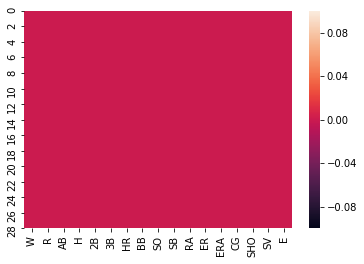

In [6]:
# heatmap of null value
sns.heatmap(bb.isnull())

In [7]:
# checking the data description
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
# corelation between coloums
bb.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


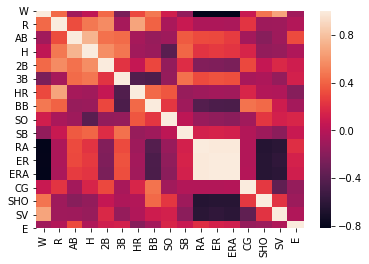

In [9]:
# heat map of corelation
sns.heatmap(bb.corr())

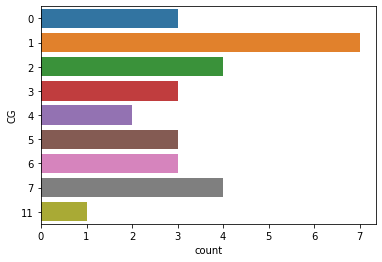

In [10]:
sns.countplot(y=bb['CG'],data=bb)

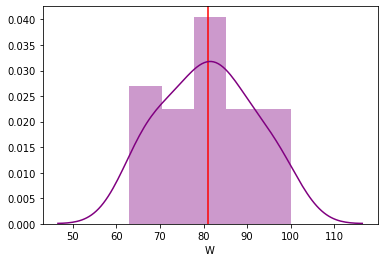

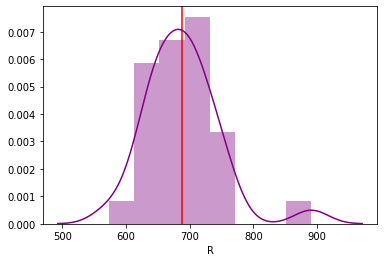

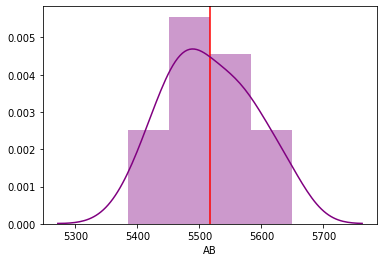

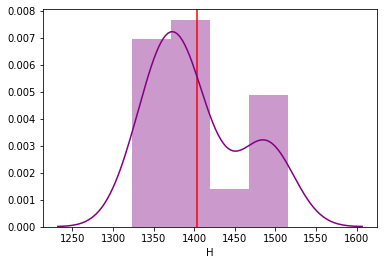

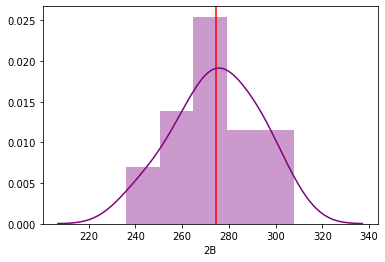

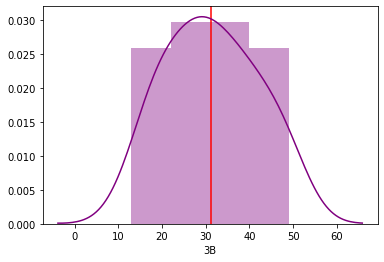

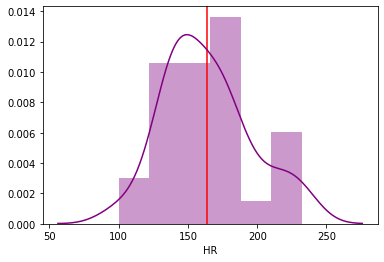

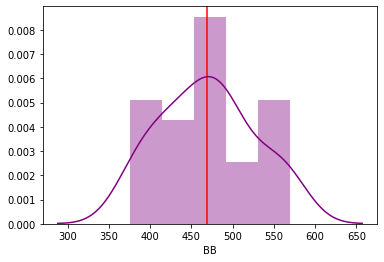

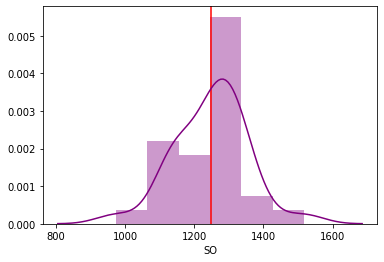

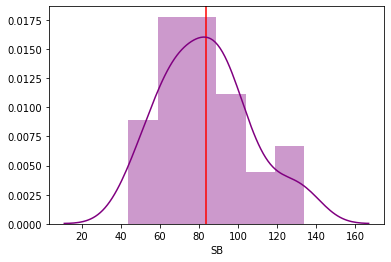

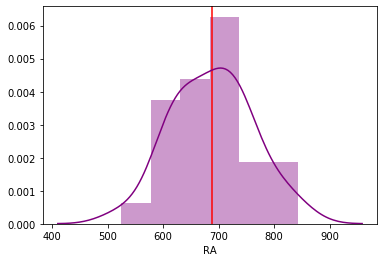

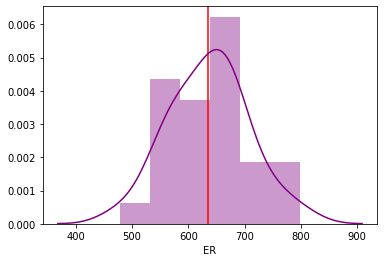

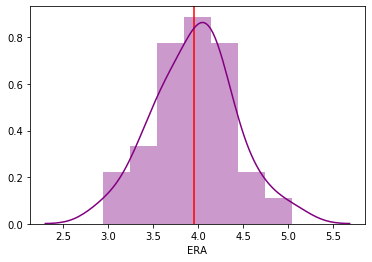

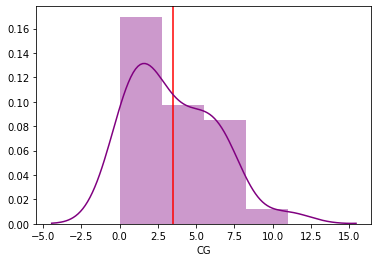

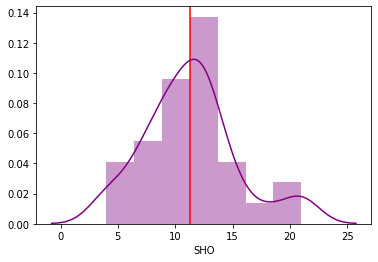

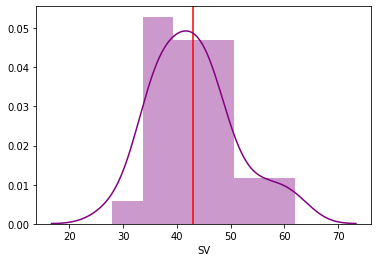

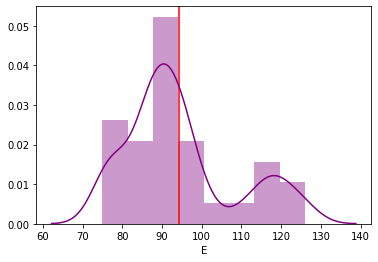

In [11]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(bb):
    plt.figure(i)
    plt.axvline(bb[col].mean(),color = 'r')
    sns.distplot(bb[col],color='purple')

W         AxesSubplot(0.125,0.772143;0.227941x0.107857)
R      AxesSubplot(0.398529,0.772143;0.227941x0.107857)
AB     AxesSubplot(0.672059,0.772143;0.227941x0.107857)
H         AxesSubplot(0.125,0.642714;0.227941x0.107857)
2B     AxesSubplot(0.398529,0.642714;0.227941x0.107857)
3B     AxesSubplot(0.672059,0.642714;0.227941x0.107857)
HR        AxesSubplot(0.125,0.513286;0.227941x0.107857)
BB     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
SO     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
SB        AxesSubplot(0.125,0.383857;0.227941x0.107857)
RA     AxesSubplot(0.398529,0.383857;0.227941x0.107857)
ER     AxesSubplot(0.672059,0.383857;0.227941x0.107857)
ERA       AxesSubplot(0.125,0.254429;0.227941x0.107857)
CG     AxesSubplot(0.398529,0.254429;0.227941x0.107857)
SHO    AxesSubplot(0.672059,0.254429;0.227941x0.107857)
SV           AxesSubplot(0.125,0.125;0.227941x0.107857)
E         AxesSubplot(0.398529,0.125;0.227941x0.107857)
dtype: object

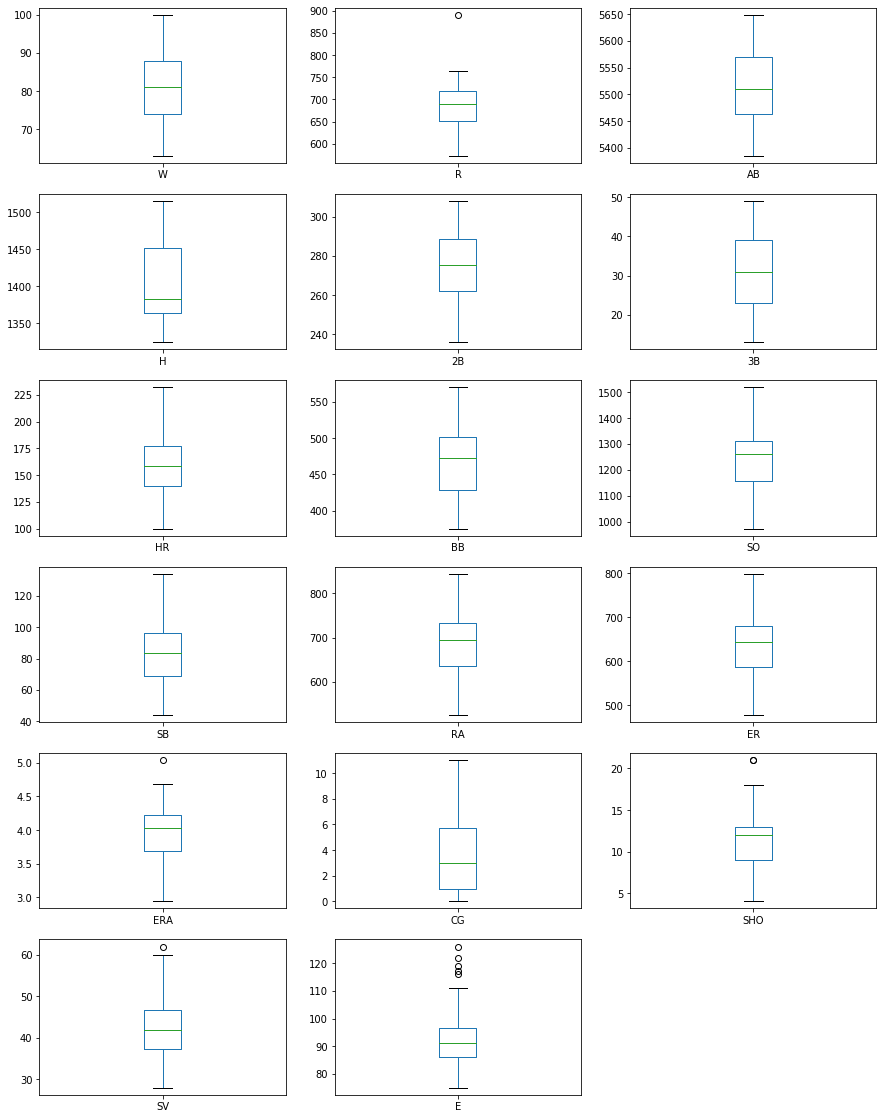

In [12]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
bb.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

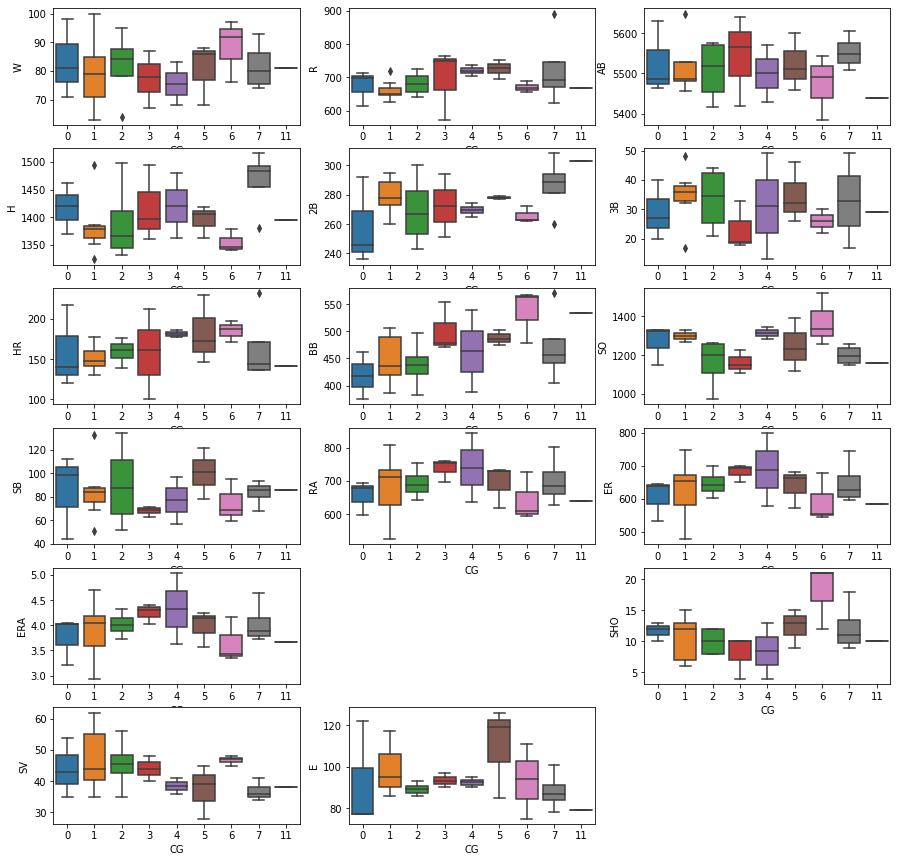

In [13]:
# Creating boxplot of continous variableswith respect to CG
figure(num=None, figsize=(15,15))
for column_index, column in enumerate(bb.columns):
    if column == 'CG':
        continue
    plt.subplot(6, 3, column_index+1)
    sns.boxplot(x='CG', y=column, data=bb)

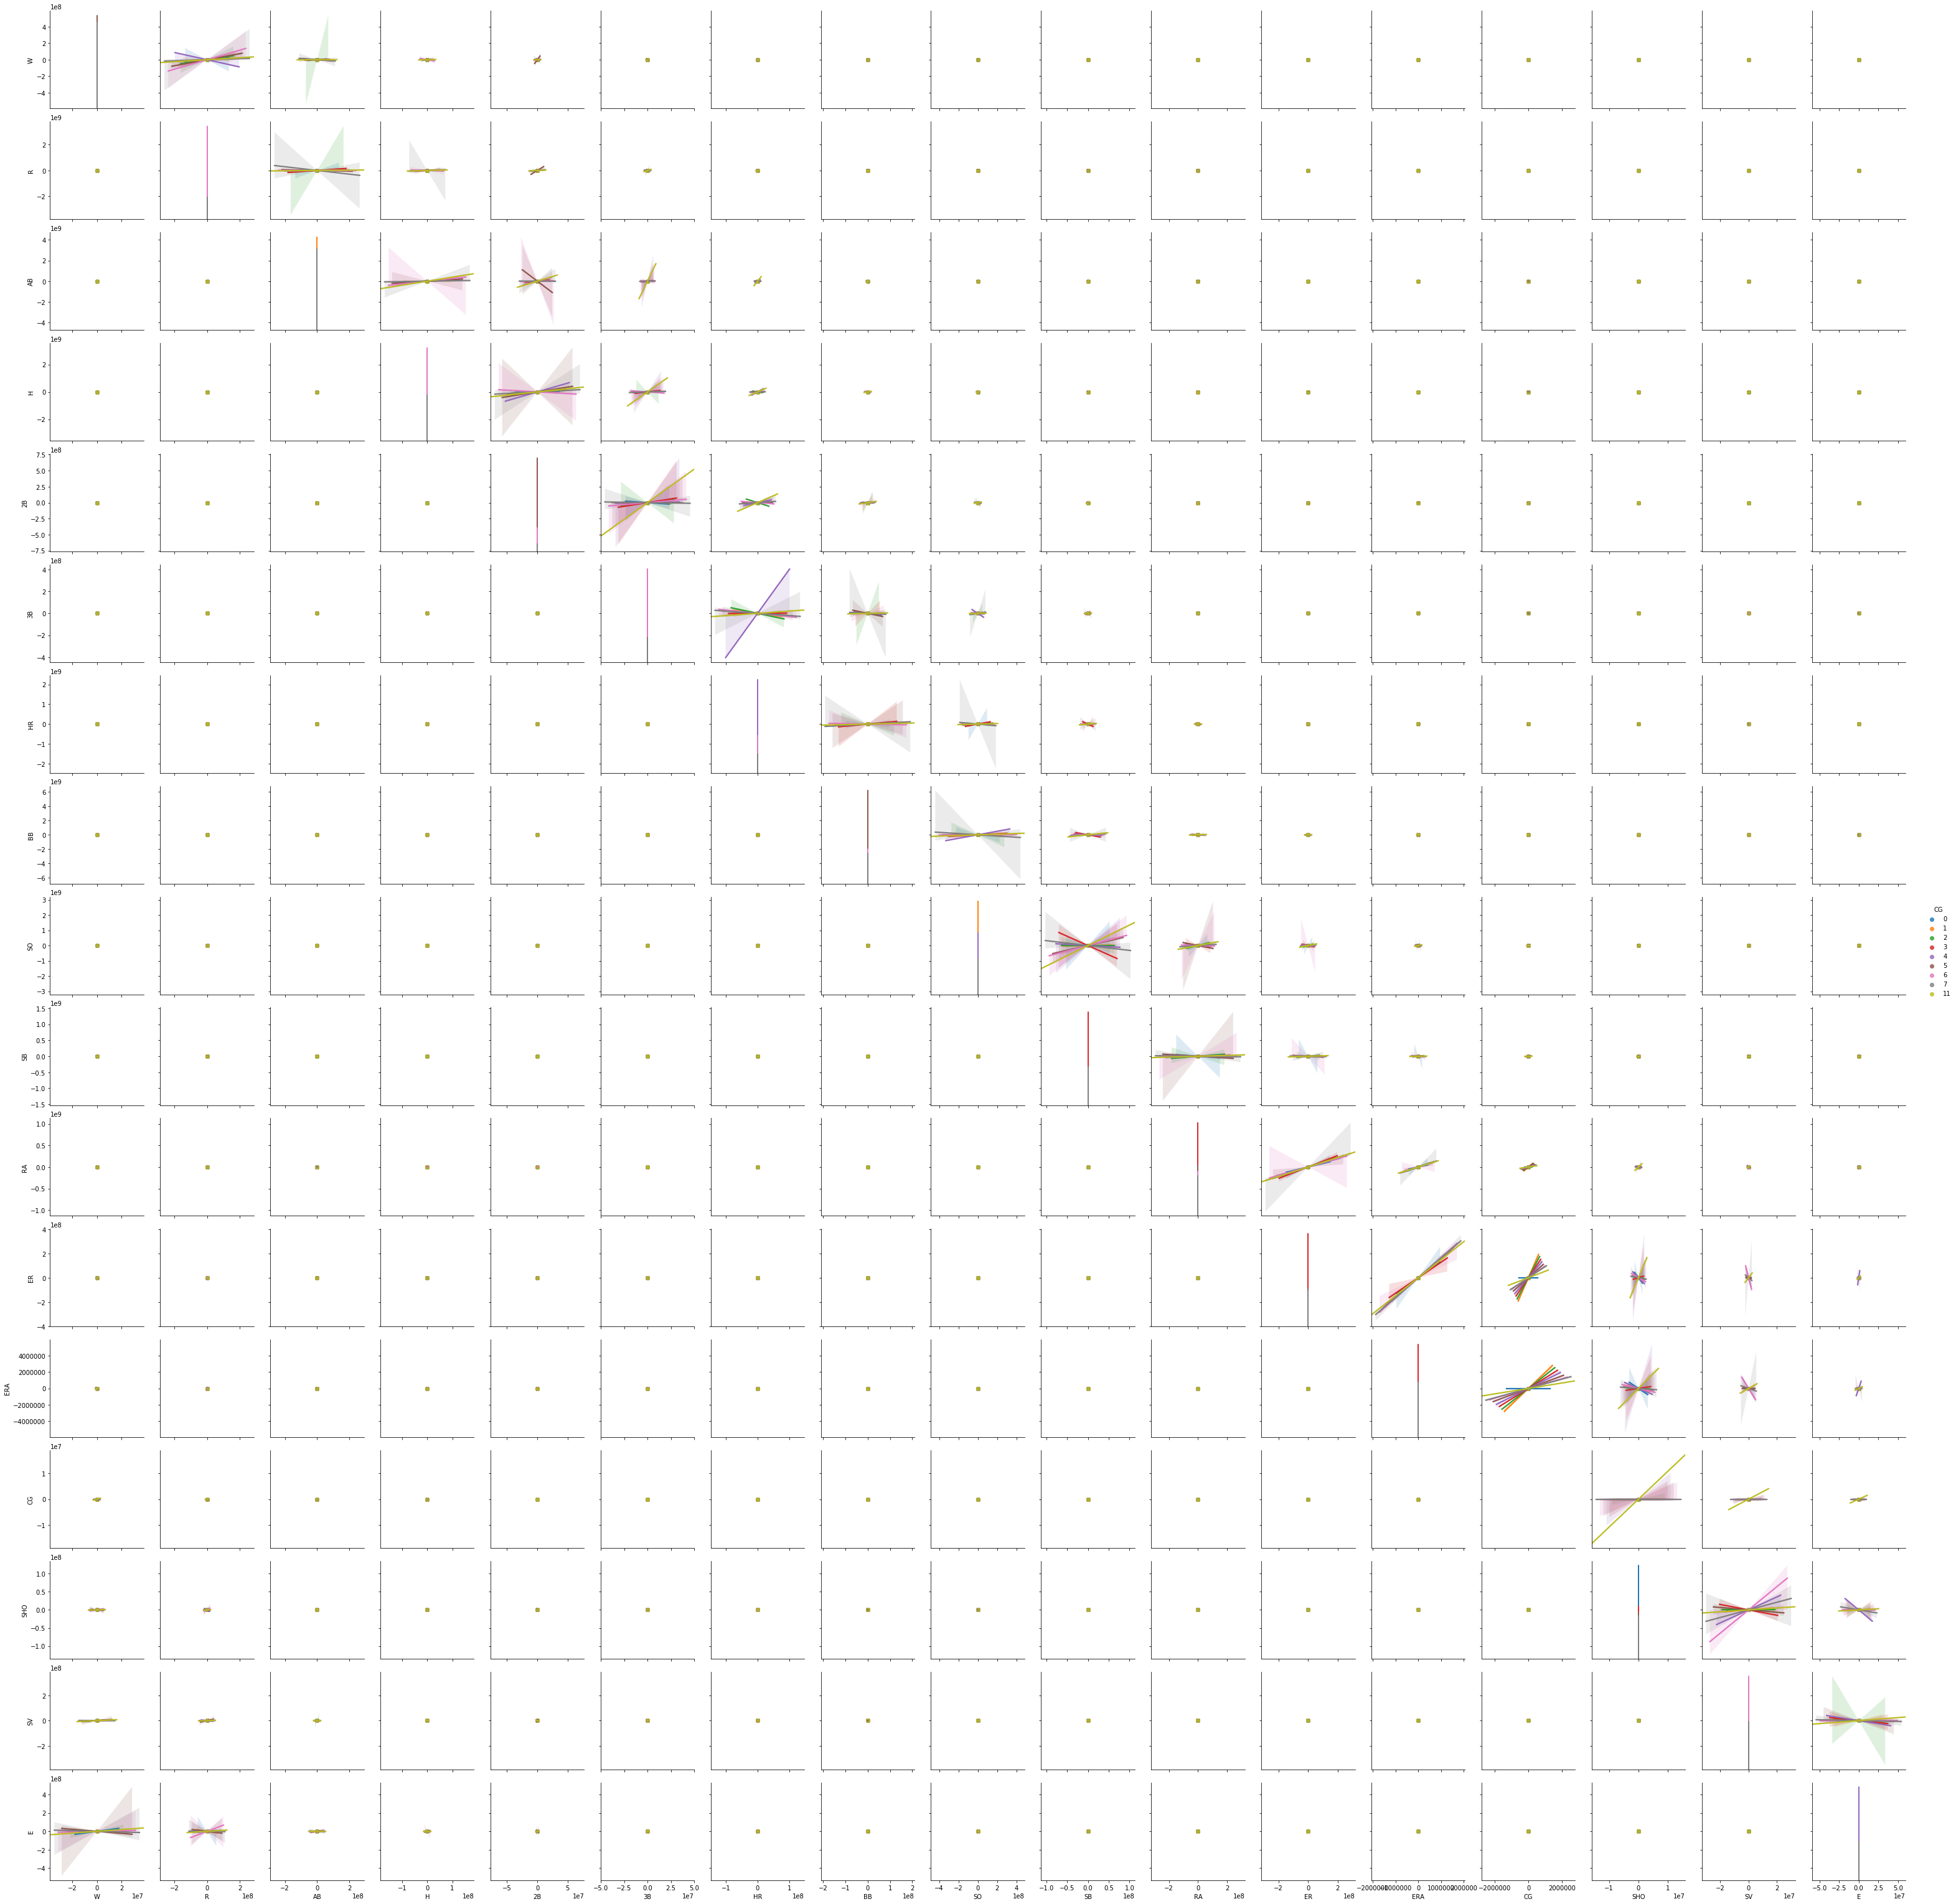

In [14]:
# pair plot to see the scatter of data
sns.pairplot(bb, kind='reg',hue='CG')

###### Manipulating data before bulding the model

In [15]:
#checking skewness
bb.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [16]:
#removing skewness
for col in bb.columns:
    if bb.skew().loc[col]>0.55:
        bb[col]=np.cbrt(bb[col])
bb.skew()

W      0.047089
R      0.892970
AB     0.183437
H      0.642599
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -1.043632
SHO   -0.280283
SV     0.325143
E      0.719735
dtype: float64

In [17]:
#removing outlires
z=abs(zscore(bb))
print(bb.shape)
bb=bb.loc[(z<3).all(axis=1)]
print(bb.shape)

(30, 17)
(29, 17)


In [18]:
# dividing dataset into input values 'x' and output value 'y'
x=bb.iloc[:,1:]
print('x dataset\n',x.head(),'\n')
y=bb.iloc[:,0]
print('y datase\n',y.head(),'\n')
print('Shape of x:',x.shape)
print('Shape of x:',y.shape)

x dataset
           R    AB          H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  \
0  8.979377  5575  11.439506  300  42  139  383   973  104  641  601  3.73   
1  8.862095  5467  11.049365  277  44  156  439  1264   70  700  653  4.07   
2  8.745985  5439  11.173556  303  29  141  533  1157   86  640  584  3.67   
3  8.536178  5533  11.136051  260  27  136  404  1231   68  701  643  3.98   
4  8.832285  5605  11.485173  289  49  151  455  1259   83  803  746  4.64   

         CG       SHO        SV         E  
0  1.259921  2.000000  3.825862  4.447960  
1  1.259921  2.289428  3.556893  4.414005  
2  2.223980  2.154435  3.361975  4.290840  
3  1.912931  2.080084  3.332222  4.657010  
4  1.912931  2.289428  3.271066  4.414005   

y datase
 0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64 

Shape of x: (29, 16)
Shape of x: (29,)


In [19]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

###### Bulding and comparing multipe model, to find out the best model

In [20]:
#creating models array with all the model
Models=[('Ridge',Ridge()),('GradientBoostingRegressor',GradientBoostingRegressor(random_state=5)),('ElasticNet',ElasticNet()),
        ('Lasso',Lasso(random_state=29)),('SGDRegressor',SGDRegressor()),('DecisionTreeRegressor',DecisionTreeRegressor(random_state=5)),
        ('KNeighborsRegressor',KNeighborsRegressor()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('LinearRegression',LinearRegression()),('SVR',SVR())]

In [21]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
Model_array=[]
Random_state=[]
Max_r2score_array=[]
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [22]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
0,Ridge,0.959524,75
3,Lasso,0.957007,82
7,RandomForestRegressor,0.947291,94
1,GradientBoostingRegressor,0.930227,11
2,ElasticNet,0.928059,46
4,SGDRegressor,0.904021,95
8,LinearRegression,0.871119,90
5,DecisionTreeRegressor,0.830986,47
6,KNeighborsRegressor,0.765226,51
9,SVR,0.217433,46


###### Conclusion
On basis of r2 score Ridge model is performing the best with maximum r2 score, closely followed by Lasso and RandomForestRegressor

In [23]:
# loop to find out the minimum mean_absolute_error of all the model in models array, along a range of random state
mean_absolute=[]
Random_state1=[]
for name, model in Models:
    min_mse=50    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        MAE=mean_absolute_error(test_y,pred)
        if MAE<min_mse:
            min_mse=MAE
            best_random_state=random_state
    mean_absolute.append(min_mse)
    Random_state1.append(best_random_state)

In [24]:
# comparing the performances of all the model on crossval basis
model_mean_absolute_performance = pd.DataFrame({'Model': Model_array,'Mean absolute error': mean_absolute,
                                            'Random state': Random_state1})
model_mean_absolute_performance.sort_values(by='Mean absolute error', ascending=True)

,Model,Mean absolute error,Random state
7,RandomForestRegressor,1.333333,94
3,Lasso,1.392167,68
2,ElasticNet,1.559350,24
0,Ridge,1.564783,46
1,GradientBoostingRegressor,1.587564,11
6,KNeighborsRegressor,1.800000,24
4,SGDRegressor,2.417808,50
8,LinearRegression,2.636971,90
9,SVR,3.915379,52
5,DecisionTreeRegressor,4.000000,65


###### Conclusion
On basis of mean_absolute_error Lasso model is performing best with least mean_absolute_error, closely followed by RandomForestRegressor and Ridge

In [25]:
# loop to find out the cross_val_score for r2 of all the model in models array
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=max_r2score)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='r2')
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [26]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
2,ElasticNet,-2.735183,6.495582
3,Lasso,-3.001729,7.519611
8,LinearRegression,-3.089416,6.329115
6,KNeighborsRegressor,-3.606530,8.549309
0,Ridge,-3.824408,8.938060
4,SGDRegressor,-5.466480,11.605393
9,SVR,-5.784345,10.287621
7,RandomForestRegressor,-7.898778,15.891945
1,GradientBoostingRegressor,-12.030724,23.723784
5,DecisionTreeRegressor,-17.294385,29.295467


###### Conclusion
Crossval score for r2 is negative for all of the model

Which implies curve fits the data even worse than does a horizontal line

More data is require to gain insite

###### On basis of our compression of r2 score, mean_absolute_error and Cross val Acuracy i choose Lasso model since it performing best on given data in all 3 scenario

In [27]:
#using grid search to improve result for Lasso model
param_grid={'alpha':[0.4, 0.5, 0.6, 0.7, 0.8],'copy_X':[True,False],'positive':[True,False],'tol':[0.2, 0.3, 0.35, 0.38],
            'precompute':[True,False],'selection':['random','cyclic'],'warm_start':[True,False],'max_iter':[500,1000,1500,2000]}
mod=Lasso(random_state=5)
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='r2',cv=10,n_jobs=3)
grid_result=grid.fit(x,y)

In [28]:
grid_result.best_score_

-1.0406153275272791

In [29]:
grid_result.best_params_

{'alpha': 0.4,
 'copy_X': True,
 'max_iter': 500,
 'positive': False,
 'precompute': False,
 'selection': 'random',
 'tol': 0.3,
 'warm_start': True}

In [30]:
grid_result.best_estimator_

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=5, selection='random',
      tol=0.3, warm_start=True)

In [31]:
# final model
ls=Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=5, selection='random',
      tol=0.3, warm_start=True)


train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=68,shuffle=True)

ls.fit(train_x,train_y)
pred_r=ls.predict(test_x)
score_r=cross_val_score(ls,x,y,cv=10,scoring='r2').mean()

print('Model score',ls.score(train_x,train_y),'\n')
print('R2 score of model is :' ,r2_score(test_y,pred_r),'\n')
print('The mean of cross_val_score for the model is:',score_r,'\n')
print('Model cofficient\n',ls.coef_,'\n')
print('Model intercept',ls.intercept_,'\n')
print('Mean absolute error for model is : ',mean_absolute_error(test_y,pred_r),'\n')
print('Mean squared error for model is : ',mean_squared_error(test_y,pred_r),'\n')
print('Root mean squared error for model is : ',np.sqrt(mean_squared_error(test_y,pred_r)),'\n')

Model score 0.8990170792460348 

R2 score of model is : 0.9510976695690745 

The mean of cross_val_score for the model is: -0.9780734610344096 

Model cofficient
 [ 3.36955024  0.          0.          0.          0.         -0.
  0.          0.         -0.3213625  -0.         -5.2650157  -0.60142964
  0.30038903  0.70895456  3.18635136  0.        ] 

Model intercept 80.49550371646987 

Mean absolute error for model is :  1.6689493422032982 

Mean squared error for model is :  4.058893425766819 

Root mean squared error for model is :  2.014669557462667 



In [32]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 7 Baseball case study.csv')

In [33]:
# saving the model using pickle.
joblib.dump(ls,'ls_Project 7 Baseball case study.pkl')

['ls_Project 7 Baseball case study.pkl']